In [1]:
import pandas as pd

df = pd.read_csv("winequalityN.csv")
df = df.dropna()

In [2]:
len(df)

6463

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [6]:
# df["quality"]에 대해서 bokeh로 histogram을 그려보기.

from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(title="Wine Quality", x_axis_label="Quality", y_axis_label="Count")
p.quad(
    top=df["quality"].value_counts(),
    bottom=0,
    left=df["quality"].unique() - 0.5,
    right=df["quality"].unique() + 0.5,
)
p.y_range.start = 0
show(p)

Loading BokehJS ...

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:12]
y = df["quality"]

#normalization/ standardization
X = StandardScaler().fit_transform(X) #train n change apply
y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1)) #train n change apply and make matrix 2d

#split data into 20%test size 80% training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

#train use linear regession
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# test the model prediction
y_pred = linear_regression.predict(X_test)

#calc loss pred and test mean.
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.11996579243598487
MAE: 0.09490668586771749


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

#dimension expansion. make new features by ^2 train data
polynormal_transform = PolynomialFeatures(degree=2)
X_train_poly = polynormal_transform.fit_transform(X_train) #train and apply the new feature to x
X_test_poly = polynormal_transform.transform(X_test) # apply it to test  too no train

# Q) X_train_poly의 shape이 왜 79인가?
print(X_train.shape, X_train_poly.shape) #shape = ori size, poly = new data expansion

#train again use linearregresion
linear_regression = LinearRegression()  
linear_regression.fit(X_train_poly, y_train)

# test the model
y_pred = linear_regression.predict(X_test_poly)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

(5170, 11) (5170, 78)
RMSE: 0.11760735660608186
MAE: 0.0927847003839534


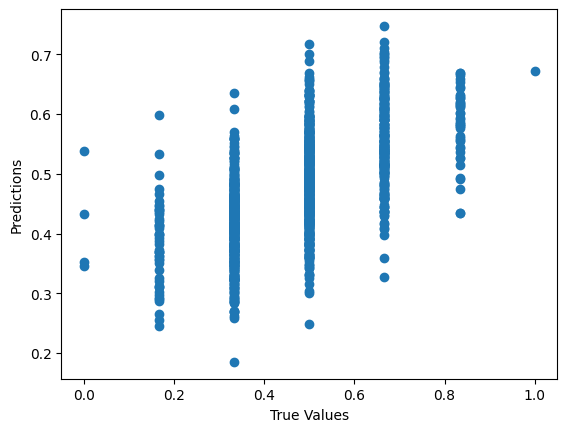

In [9]:
# y_pred와 y_test에 대해서 scatter plot을 그리기
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred)
ax.set_xlabel("True Values")
ax.set_ylabel("Predictions")
plt.show()

In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

#make linear model with regularization to avoid overfitting
ridge_regression = Ridge(alpha=0.1) #strong alpha less overfit, too big can make underfit
ridge_regression.fit(X_train, y_train)

# test the model
y_pred = ridge_regression.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.11996598251253457
MAE: 0.09490691407034978


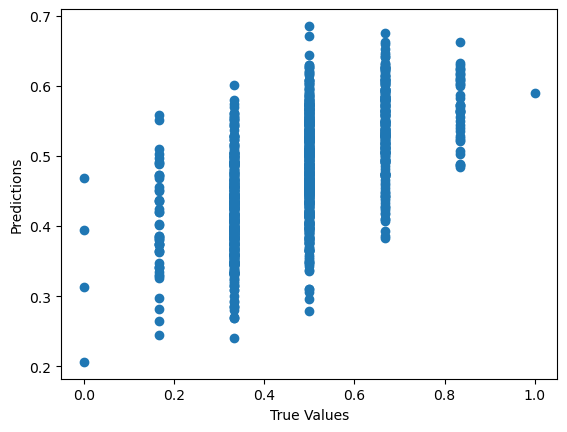

In [9]:
# y_pred와 y_test에 대해서 scatter plot을 그리기
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred)
ax.set_xlabel("True Values")
ax.set_ylabel("Predictions")
plt.show()

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

#use multi layer regession
mlp_regression = MLPRegressor(
    hidden_layer_sizes=(32, 32, 32), #3 hidden layer with each 32 neuron
    activation="relu", #activation function relu
    max_iter=1000, #epoch
    early_stopping=True, #if improve no more = stop model
    alpha=0.1, #regularization strength
    learning_rate_init=0.001,
    random_state=42,
)
mlp_regression.fit(X_train, y_train)

# test the model
y_pred = mlp_regression.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

c:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.11444547998076347
MAE: 0.089870555331646


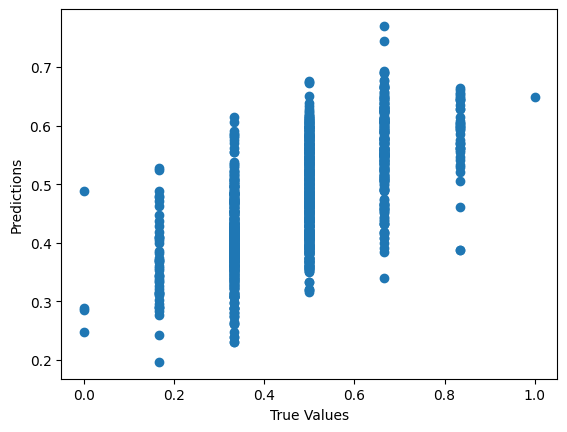

In [13]:
# y_pred와 y_test에 대해서 scatter plot을 그리기
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred)
ax.set_xlabel("True Values")
ax.set_ylabel("Predictions")
plt.show()

In [13]:
# Classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#data decalre
X = df.iloc[:, 1:12]
y = df["quality"]

#train n apply standardization
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn no parameter exist when setting
from sklearn.metrics import accuracy_score

#if data near to the 5 neighbor then classifiy data as the same class
#see data 5 nearest neighbor to classify which calss nearby majority
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

#train data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) #predict the result

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}") #near to 1.0 accuracy high

Accuracy: 0.5560711523588554


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = 50
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5375096674400619


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#classifiy based on linear line. divide based on which side the data on 
svm = SVC(kernel="linear")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5181747873163186


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel="rbf")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.57153905645785


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel="poly")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.534416086620263


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel="sigmoid")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4176334106728538


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 64, 64), #3 hidden layer w 64 neuron each
    activation="relu", #activation function
    max_iter=1000, #epoch
    early_stopping=True,
    alpha=0.1,
    learning_rate_init=0.001,
    random_state=42,
)

mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5839133797370456
